['Marcadores geneticos', 'Autoanticuerpos', 'Antecedentes familiares', 'Factores ambientales', 'Niveles de insulina', 'Edad', 'IMC', 'Actividad fisica ', 'Abitos dieteticos', 'Presion sanguinia ', 'Niveles de colesterol', 'Talla', 'Nivees de glucosa', 'Origen etnico', 'Factores socioecomonicos ', 'Tabaquismo', 'Consumo de alcohol', 'Tolerancia a la glucosa', 'Sindrome de ovario poliquístico', 'Diabetes gestional', 'Tipo de embarazo', 'Aumento de peso en el embarazo', 'Salud pancriatica', 'Niveles de encimas digestiva', 'Analisis de orina', 'Peso al nacer', 'Sistomas de inicio temprano']
Información general del DataFrame
Cantidad de filas y columnas: (598, 27)
--------------------------------------------------
Cantidad de datos nulos por columna: 
Marcadores geneticos               0
Autoanticuerpos                    0
Antecedentes familiares            0
Factores ambientales               0
Niveles de insulina                0
Edad                               0
IMC                  

,tipo_diabetes,antecedentes_familiares,niveles_insulina,edad,imc,actividad_fisica,habitos_dieteticos,presion_sanguinea,niveles_colesterol,talla,...,tabaquismo,consumo_alcohol,tolerancia_glucosa,sindrome_ovario_poliquistico,diabetes_gestacional,tipo_embarazo,aumento_peso_embarazo,salud_pancreatica,analisis_orina,peso_nacimiento
0,Steroid-Induced Diabetes,No,40,44,38,High,Healthy,124,201,50,...,Smoker,High,Normal,No,No,Normal,18,36,Ketones Present,2.629
1,Neonatal Diabetes Mellitus (NDM),No,13,1,17,High,Healthy,73,121,24,...,Non-Smoker,Moderate,Normal,Yes,No,Normal,8,26,Glucose Present,1.881
2,Prediabetic,Yes,27,36,24,High,Unhealthy,121,185,36,...,Smoker,High,Abnormal,Yes,No,Normal,15,56,Ketones Present,3.622
3,Type 1 Diabetes,No,8,7,16,Low,Unhealthy,100,151,29,...,Smoker,Moderate,Abnormal,No,Yes,Normal,12,49,Ketones Present,3.542
4,Wolfram Syndrome,Yes,17,10,17,High,Healthy,103,146,33,...,Smoker,Moderate,Normal,No,Yes,Complications,2,10,Protein Present,1.770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,Type 1 Diabetes,Yes,19,11,16,Moderate,Healthy,105,187,33,...,Smoker,High,Normal,Yes,No,Normal,22,67,Normal,2.585
594,Secondary Diabetes,No,31,48,22,High,Healthy,141,294,40,...,Non-Smoker,Moderate,Normal,Yes,No,Complications,21,55,Glucose Present,3.023
595,Type 2 Diabetes,Yes,12,41,36,High,Unhealthy,146,233,48,...,Smoker,Moderate,Normal,Yes,Yes,Complications,31,85,Protein Present,3.202
596,Cystic Fibrosis-Related Diabetes (CFRD),No,17,15,25,Moderate,Healthy,108,169,32,...,Smoker,Moderate,Normal,No,No,Complications,22,40,Protein Present,3.111


--------------------------------------------------
--------------------------------------------------
------------------- CONTEOS --------------------
El valor más común de la columna edad en nuestro dataframe es 1 año de edad
--------------------------------------------------
Edad media: 
31.471571906354516
--------------------------------------------------
El nivel de insulina máxima y mínima son: 
49, 5
--------------------------------------------------
El tipo de alcoholismo más común es: 
High
--------------------------------------------------
El nivel de colesterol más alto y más bajo son: 
299, 102
--------------------------------------------------
¿Hay más fumadores que no fumadores?
Hay más fumadores que no fumadores que padecen de diabetes.
--------------------------------------------------
Métricas de glucosa:
Promedio: 159.08695652173913, Mediana: 148.5, Rango: 215
--------------------------------------------------
Correlación entre glucosa y presión arterial
Correlación en

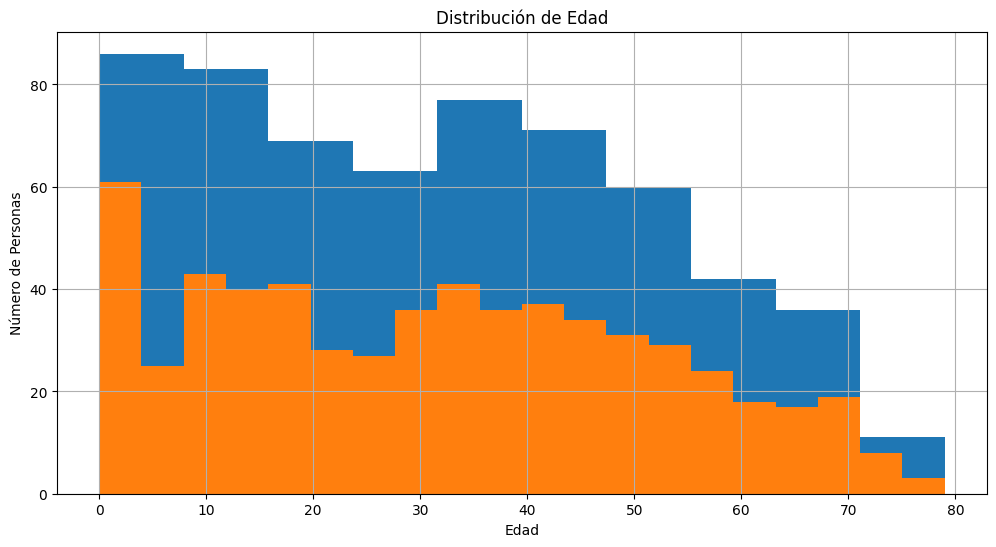

rango_edad
20-30    75
31-40    93
41-50    87
51-60    68
61-70    48
71-80    17
81-90     0
Name: count, dtype: int64


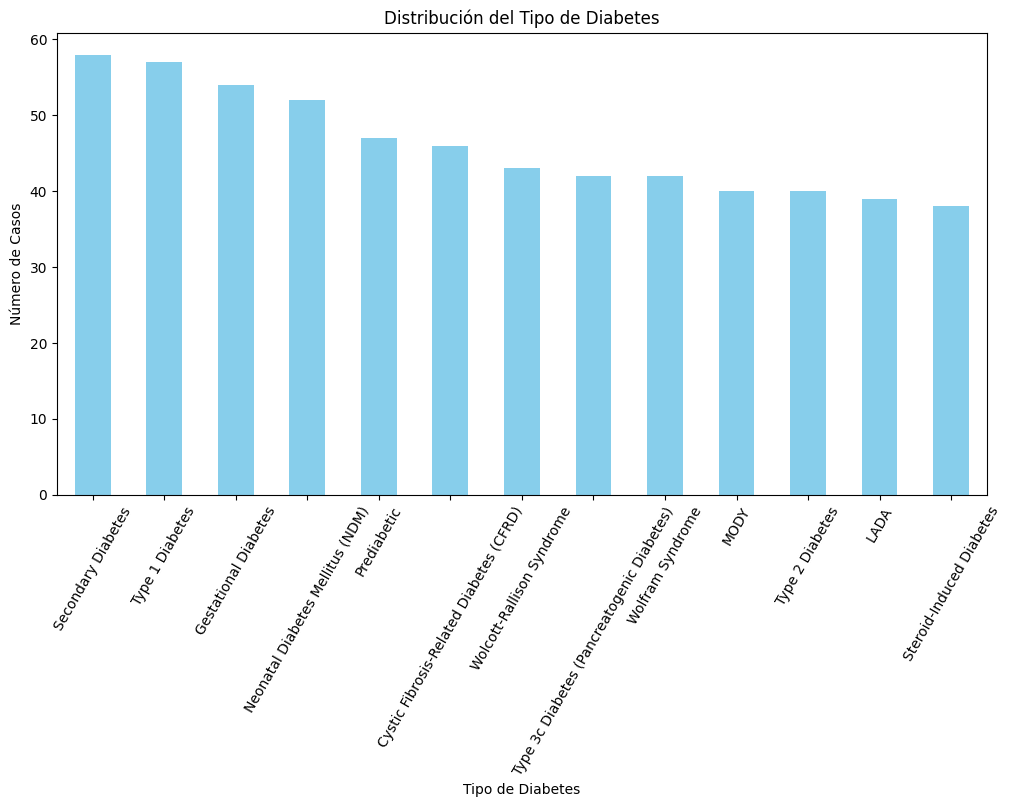

<ipython-input-101-eb906b149ca3>:212: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_tipo_diabetes_por_edad = df.groupby(['rango_edad', 'tipo_diabetes']).size().unstack()


<Figure size 2000x600 with 0 Axes>

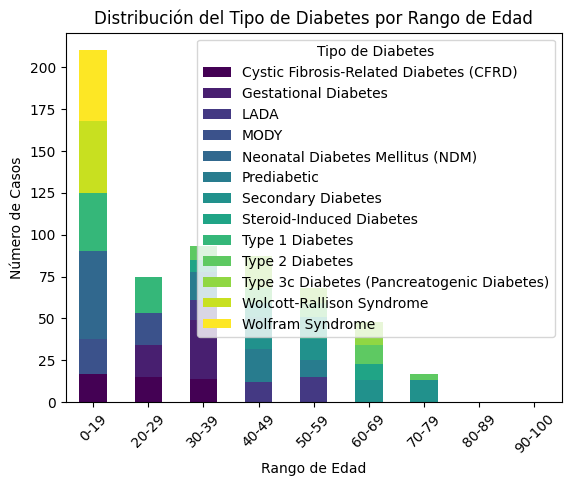

In [ ]:
# %%

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt


# 1. Cargar datos diabetes desde un archivo CSV
df = pd.read_csv("./Proyecto/diabetes.csv", encoding='latin-1', index_col=0)
df.head()



# 2. Exploramos BD
print(df.columns.tolist())

def info_general_df(df):
  print('Información general del DataFrame')
  print(f'Cantidad de filas y columnas: {df.shape}')
  print("-"*50)
  print(f'Cantidad de datos nulos por columna: \n{df.isnull().sum()}')
  print("-"*50)
  print(f'Cantidad de datos únicos por columna: \n{df.nunique()}')
  print("-"*50)
  print(f'Tipos de datos por columna: \n{df.dtypes}')

info_general_df(df)



# 3. Hacemos una copia de la base de datos
df_copia = df.copy()


# ======= Limpiar DB =======
# 4. Eliminar columnas que no aportan información necesaria para el enfoque del proyecto
df = df.drop(['Marcadores geneticos',
              'Autoanticuerpos',
              'Factores ambientales',
              'Origen etnico',
              'Niveles de encimas digestiva',
              'Sistomas de inicio temprano'], axis=1) #axis = 1 indica que se eliminan columnas



# 6. Renombro columnas y arreglo una columna
df = df.rename(columns= {
    'Antecedentes familiares': 'antecedentes_familiares', 
    'Niveles de insulina': 'niveles_insulina', 
    'Edad': 'edad', 
    'IMC': 'imc',
    'Actividad fisica ': 'actividad_fisica', 
    'Abitos dieteticos': 'habitos_dieteticos', 
    'Presion sanguinia ': 'presion_sanguinea',
    'Niveles de colesterol': 'niveles_colesterol', 
    'Talla': 'talla',
    'Nivees de glucosa': 'niveles_glucosa',
    'Factores socioecomonicos ': 'factores_socioeconomicos', 
    'Tabaquismo': 'tabaquismo', 
    'Consumo de alcohol': 'consumo_alcohol',
    'Tolerancia a la glucosa': 'tolerancia_glucosa', 
    'Sindrome de ovario poliquístico': 'sindrome_ovario_poliquistico',
    'Diabetes gestional': 'diabetes_gestacional', 
    'Tipo de embarazo': 'tipo_embarazo',
    'Aumento de peso en el embarazo': 'aumento_peso_embarazo', 
    'Salud pancriatica': 'salud_pancreatica',
    'Analisis de orina': 'analisis_orina', 
    'Peso al nacer': 'peso_nacimiento'
})

# Convertir la columna de gramos a kilogramos
df['peso_nacimiento'] = df['peso_nacimiento'] / 1000

# Verifico los primeros valores para asegurar de que la conversión fue correcta
print(df['peso_nacimiento'].head())


#  7. Comprobamos el cambio y hacemos una copia para trabajar con el dataFrame
df.head()
df.reset_index(inplace=True)
df.to_csv('db_diabetes.csv', index=False) #para que la primera columna se unifique
df


# 8. Cambiamos el index a columna y arreglamos una columna
df = df.rename(columns= {'Tipo': 'tipo_diabetes'})
print(df.columns)
display(df)



# ====================== ANÁLISIS ========================

print("-"*50)
print("-"*50)


def conteos(df):
  print('------------------- CONTEOS --------------------')
  print(f'El valor más común de la columna edad en nuestro dataframe es {df['edad'].mode()[0]} año de edad')
  print("-"*50)
  print(f'Edad media: \n{df['edad'].mean()}')
  print("-"*50)
  print(f'El nivel de insulina máxima y mínima son: \n{df['niveles_insulina'].max()}, {df['niveles_insulina'].min()}')
  print("-"*50)
  print(f'El tipo de alcoholismo más común es: \n{df['consumo_alcohol'].mode()[0]}')
  print("-"*50)
  print(f'El nivel de colesterol más alto y más bajo son: \n{df["niveles_colesterol"].max()}, {df["niveles_colesterol"].min()}')

conteos(df)

print("-"*50)
print('¿Hay más fumadores que no fumadores?')

fumadores = df['tabaquismo'].value_counts()['Smoker']
no_fumadores = df['tabaquismo'].value_counts()['Non-Smoker']

if fumadores > no_fumadores:
  print("Hay más fumadores que no fumadores que padecen de diabetes.")
else:
  print("No hay más fumadores que no fumadores que padecen de diabetes.")
  print("Puede que la población estudiada de diabetes tenga una mayor prevalencia de no fumadores.")


print("-"*50)
# Calculamos métricas de glucosa

print("Métricas de glucosa:")
avg_glucosa = df['niveles_glucosa'].mean()
glucosa_col = [col for col in df.columns if 'glucosa' in col.lower()]

if glucosa_col:
  avg_glucosa = df[glucosa_col[0]].mean()
else:
  print("Columna 'glucosa' no encontrada en el DataFrame.")

mediana_glucosa = df['niveles_glucosa'].median()
rango_glucosa = df['niveles_glucosa'].max() - df['niveles_glucosa'].min()

print(f"Promedio: {avg_glucosa}, Mediana: {mediana_glucosa}, Rango: {rango_glucosa}")

print("-"*50)

# Calcular correlación entre glucosa y presión arterial

print("Correlación entre glucosa y presión arterial")
correlacion = df['niveles_glucosa'].corr(df['presion_sanguinea'])  
print(f"Correlación entre glucosa y presión arterial: {correlacion}")


# Definir criterios
sobrepeso = df['imc'] > 25
glucosa_alta = df['niveles_glucosa'] > 140

# Filtrar pacientes
pacientes_riesgo = df[sobrepeso & glucosa_alta]

# Número de pacientes en riesgo
print(f"Número de pacientes con sobrepeso y glucosa elevada: {pacientes_riesgo.shape[0]}")


print("-"*50)
# Calcular percentiles de edades
print('¿Cuál es la distribución de las edades de los pacientes?')
percentiles = df['edad'].describe(percentiles=[0.25, 0.5, 0.75])

# Mostrar percentiles
print(percentiles)

# Graficar histograma
plt.figure(figsize=(12, 6))
df['edad'].hist(bins=10)
df['edad'].hist(bins=20)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Número de Personas')
plt.show()

bins = [20, 30, 40, 50, 60, 70, 80, 90] #bins define los límites en los intervalos
labels = ['20-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'] # labels las etiquetas que se mostrarán
df['rango_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)
conteo_rango_edad = df['rango_edad'].value_counts().sort_index()
print(conteo_rango_edad)


# =================================================================================================
# Contar la frecuencia de cada tipo de diabetes
conteo_tipo_diabetes = df['tipo_diabetes'].value_counts()

# Graficar la distribución de tipo de diabetes
plt.figure(figsize=(12, 6))
conteo_tipo_diabetes.plot(kind='bar', color='skyblue')
plt.title('Distribución del Tipo de Diabetes')
plt.xlabel('Tipo de Diabetes')
plt.ylabel('Número de Casos')
plt.xticks(rotation=60)
plt.show()


# =================================================================================================

# Definir los rangos de edad
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Crear una nueva columna con los rangos de edad
df['rango_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False) # pd.cut() se usa para segmentar y clasificar los datos en bins (intervalos), right=False indica que el intervalo no incluye el límite superior

# Contar la frecuencia de cada tipo de diabetes en cada rango de edad
# grouby() agrupa por rango_edad y tipo_diabetes en función de combinaciones únicas de rangos de edad y tipo de diabetes.
# size() cuenta el número de elementos en cada grupo creado por groupby() = serie con el conteo de casos para cada combinacipon rango_edad y tipo_diabetes
# unstack() trnasforma el índice de la serie en columnas y filas
conteo_tipo_diabetes_por_edad = df.groupby(['rango_edad', 'tipo_diabetes']).size().unstack()


# Graficar la distribución de tipo de diabetes por rango de edad
plt.figure(figsize=(20, 6))
conteo_tipo_diabetes_por_edad.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribución del Tipo de Diabetes por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Diabetes')
plt.show()